# Add Columns

### New Feature -- AgeGroup

In [16]:
# Define age_division
def age_to_age_division(age):
    if age<=34             : return 0
    if (35<=age)&(age<=39) : return 1
    if (40<=age)&(age<=44) : return 2
    if (45<=age)&(age<=49) : return 3
    if (50<=age)&(age<=54) : return 4
    if (55<=age)&(age<=59) : return 5
    if (60<=age)&(age<=64) : return 6
    if (65<=age)&(age<=69) : return 7
    if (70<=age)&(age<=74) : return 8
    if (75<=age)&(age<=79) : return 9
    if age>=80             : return 10
    
age_division = df['age'].apply(age_to_age_division)

df.insert(14, 'age_division', value=age_division)

In [16]:
# Define age_division
def age_to_age_division(age):
    if age<=34             : return 0
    if (35<=age)&(age<=44) : return 1
    if age>=45             : return 2
    
    
age_division = df['age'].apply(age_to_age_division)

df.insert(14, 'age_division', value=age_division)

In [17]:
df[['age', 'age_division']].head(8)

,age,age_division
0,47,3
1,33,0
2,41,2
3,24,0
4,40,2
5,29,0
6,28,0
7,29,0


### New Features -- avgSpeed*

In [18]:
milestones = [['5k', '10k', '20k', '25k', '30k', '35k', '40k'],
              [ 5,    10,    20,    25,    30,    35,    40]]
loc = 10
for i, j in zip(*milestones):
    values = df[i] / j
    df.insert(loc, i+'_avgSpeed', values)
    loc += 1

In [19]:
df.head(8)

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,5k_avgSpeed,10k_avgSpeed,20k_avgSpeed,25k_avgSpeed,30k_avgSpeed,35k_avgSpeed,40k_avgSpeed,rank_overall,rank_in_gender_only,rank_in_division,age,age_division,gender,country,state
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,3.27,1.604,1.737,1.8825,1.9068,1.972667,2.040000,2.01075,8,8,8,47,3,M,JPN,others
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,5.30,3.244,3.258,3.2915,3.2972,3.311000,3.324857,3.30250,21,1,1,33,0,F,KEN,others
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,3.08,1.550,1.662,1.8050,1.8320,1.881667,1.926286,1.90250,1,1,1,41,2,M,RSA,others
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,5.37,3.240,3.257,3.2915,3.2972,3.311000,3.324857,3.32375,27,3,3,24,0,F,ETH,others
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,3.10,1.604,1.712,1.8290,1.8548,1.901000,1.938000,1.91800,2,2,2,40,2,M,JPN,others
5,16.22,32.58,65.83,69.47,82.45,99.33,116.37,132.95,140.68,5.37,3.244,3.258,3.2915,3.2980,3.311000,3.324857,3.32375,28,4,4,29,0,F,KEN,others
6,8.38,17.65,37.65,39.72,47.67,58.60,70.23,79.83,84.65,3.23,1.676,1.765,1.8825,1.9068,1.953333,2.006571,1.99575,4,4,4,28,0,M,SUI,others
7,15.17,30.48,61.62,64.85,76.95,92.52,107.47,122.80,129.83,4.97,3.034,3.048,3.0810,3.0780,3.084000,3.070571,3.07000,5,5,5,29,0,M,ETH,others


In [20]:
profile = ProfileReport(df, title='Profiling Report -- Boston Marathon 2014', explorative=True)
profile.to_file("Boston_2014_Profiling.html")

In [24]:
list(df.select_dtypes(include=numerics).columns.values)


['5k',
 '10k',
 '20k',
 'half',
 '25k',
 '30k',
 '35k',
 '40k',
 'official',
 'pace',
 'age']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


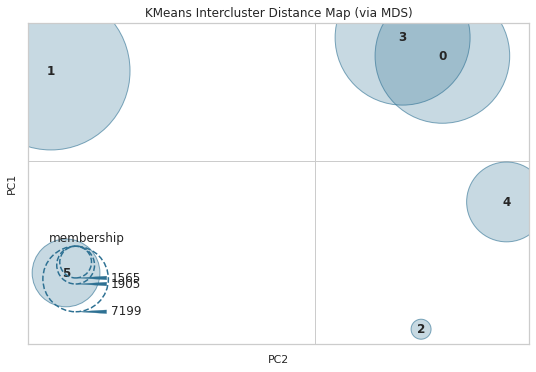

In [45]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=optimum_k, random_state=10)
visualizer = InterclusterDistance(model)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Analysis of Mean Average Silhouette Coefficient

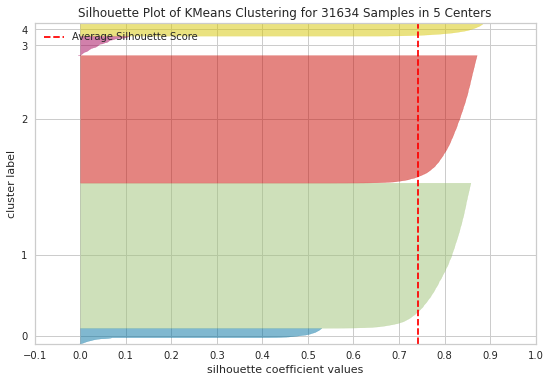

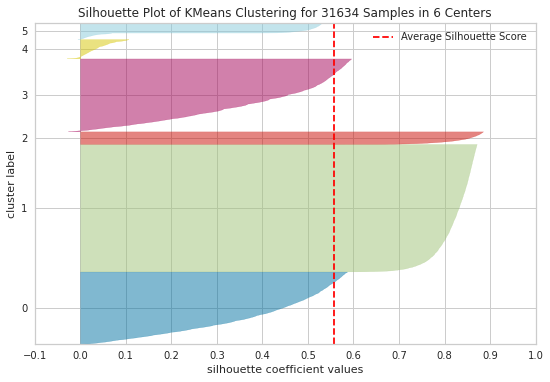

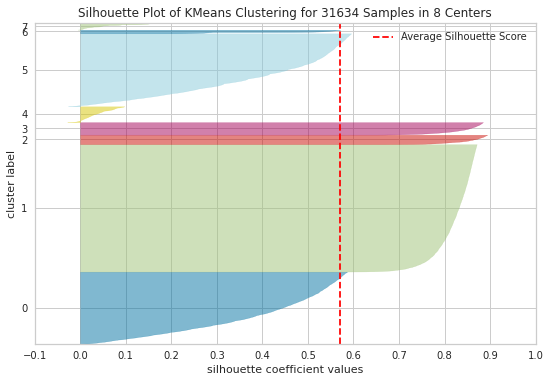

In [35]:
# Average Silhouette score
from yellowbrick.cluster import silhouette_visualizer

the_range = [5, 6, 8]

for k in the_range:
    silhouette_visualizer(KMeans(k, random_state=10), df, colors='yellowbrick')

Searching for the optimum k of clusters, we plot the average score and expect:
* Firstly, The mean value should be as ***close to 1*** as possible
* Secondly, The plot of each cluster should be ***above the mean value*** as much as possible. Any plot region below the mean value is not desirable.
* Lastly, the ***width of the plot should be as uniform*** as possible.

***Comments***
* All of plot respecting to k have below-average clusters.
* At k of 15 and 20, some clusters are too thin, is thers a signal of overfit (over-clustering)?

I don't know how to interprete better, so I take a shot at BIC score with a Gaussian Mixture Model. Let's choose ***k = 6***.

In [8]:
# Save to csv
cluster = pd.DataFrame(data=cluster_labels, columns=['cluster'])
cluster.to_csv('clusterLabel_OPTICS.csv', index=False)

# Test

In [9]:
cluster_1.groupby('age_division').count()

,Unnamed: 0,5k,10k,20k,half,25k,30k,35k,40k,official,pace,5k_avgSpeed,10k_avgSpeed,20k_avgSpeed,25k_avgSpeed,30k_avgSpeed,35k_avgSpeed,40k_avgSpeed,rank_overall,rank_in_gender_only,rank_in_division,age,gender,country,state,city,cluster
age_division,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795
0.1,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109
0.2,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618
0.3,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905,2905
0.4,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458,2458
0.5,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768,1768
0.6,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097,1097
0.7,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529,529
0.8,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157,157


In [48]:
age_cluster_0 = cluster_0.groupby('age_division').count().cluster
px.bar(age_cluster_0)



KeyError: 'age_division'

In [11]:
age_cluster_1 = cluster_1.groupby('age_division').count().cluster
px.bar(age_cluster_1)

In [12]:
cluster_1.groupby('age_division').count().cluster

age_division
0.0    3795
0.1    2109
0.2    2618
0.3    2905
0.4    2458
0.5    1768
0.6    1097
0.7     529
0.8     157
0.9      41
1.0       7
Name: cluster, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

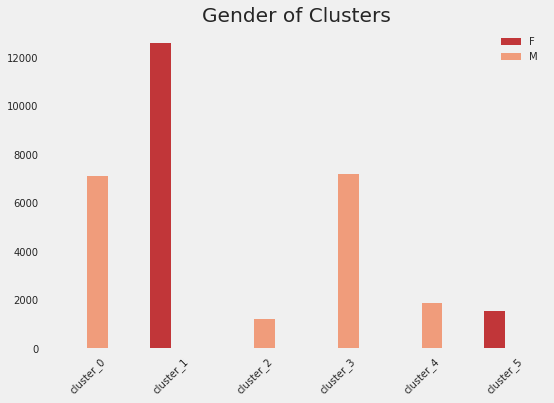

In [111]:
cluster_gender.plot(kind='bar', 
                    title='Gender of Clusters',
                    grid=False)
plt.xticks(rotation=45)

# Test -- lay countries

## Data for Charateristic

In [67]:
# Not using in this notebook, but in my excel file to presentation
for i in range(n_cluster):
    index = str(i)
    temp = df[df.cluster==i]
    temp.to_csv('cluster_' + index + '.csv', index=False)

In [9]:
test = pd.read_csv('cluster_0.csv')

test

,name,5k,10k,20k,half,25k,30k,35k,40k,official,pace,rank_overall,rank_in_gender_only,rank_in_division,age,gender,country,state,city,bib,cluster
0,"Malik, Ronald W.",13.32,29.60,67.87,71.37,87.28,111.58,137.20,153.87,163.20,6.23,49,39,37,59,M,USA,IL,Tremont,W49,0
1,"Ahearn, Christopher",16.20,34.50,78.82,83.05,101.08,130.02,161.52,180.40,191.33,7.30,53,42,39,52,M,USA,MA,Framingham,W51,0
2,"Ebiner, Matt",18.43,36.82,74.15,78.22,92.77,112.35,132.80,152.72,161.42,6.17,389,362,5,53,M,USA,CA,Covina,219,0
3,"Meigs, Tim",24.88,49.67,94.85,99.67,117.33,140.03,163.32,187.27,198.20,7.57,5969,5182,753,47,M,USA,NC,Raleigh,310,0
4,"Fernandez, Douglas",17.77,35.97,72.93,77.05,91.40,109.83,128.50,146.63,154.72,5.92,172,151,2,53,M,USA,VA,Richmond,408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,"Tamuleviz, Joseph G.",32.23,68.95,150.40,159.45,198.90,248.05,300.27,351.20,371.38,14.17,31227,17260,2434,54,M,USA,MA,Millis,35895,0
7130,"Maggiacomo, Derek",28.38,57.75,117.42,124.03,149.88,186.15,223.22,261.43,278.13,10.62,24550,14068,2187,44,M,USA,MA,Duxbury,35899,0
7131,"Reno, James T.",34.12,69.53,144.65,153.02,190.55,237.68,288.30,336.62,356.20,13.60,30827,17092,1725,56,M,USA,MA,Reading,35902,0
7132,"Morris, David",37.10,76.75,163.78,173.45,210.07,257.60,305.57,352.18,374.22,14.28,31296,17288,2598,44,M,USA,MA,Wayland,35907,0


In [10]:
test.country.value_counts()

USA    7134
Name: country, dtype: int64

In [34]:
for i in range(n_cluster):
    index = str(i)
    tmp = pd.read_csv('cluster_'+index+'.csv')
    print('---- Cluster '+index+'----')
    print(tmp.country.count())

---- Cluster 0----
1565
---- Cluster 1----
14333
---- Cluster 2----
12596
---- Cluster 3----
1905
---- Cluster 4----
1235


In [58]:
for i in range(5) : print('CLUSTER '+str(i), df[df.cluster==i].describe())

CLUSTER 0                 5k          10k          20k         half          25k  \
count  1565.000000  1565.000000  1565.000000  1565.000000  1565.000000   
mean     26.111233    52.576556   107.329105   113.311502   135.929042   
std       3.155625     6.552830    14.444884    15.299051    19.187363   
min       9.250000    19.750000    43.150000    45.420000    54.880000   
25%      24.070000    48.280000    98.000000   103.450000   123.750000   
50%      25.880000    51.930000   105.350000   111.170000   132.900000   
75%      27.770000    55.920000   114.350000   120.770000   145.330000   
max      39.200000    74.930000   177.970000   188.170000   227.920000   

               30k          35k          40k     official         pace  \
count  1565.000000  1565.000000  1565.000000  1565.000000  1565.000000   
mean    166.477367   198.393853   229.807553   243.474850     9.294524   
std      24.791545    30.836702    36.804387    39.201249     1.494827   
min      68.180000    81.58